-------------------------------------------------------
================== 1.Data Selection ===================
-------------------------------------------------------

       ID  age          job   marital  education default  balance housing  \
0   26110   56       admin.   married    unknown      no     1933      no   
1   40576   31      unknown   married  secondary      no        3      no   
2   15320   27     services   married  secondary      no      891     yes   
3   43962   57   management  divorced   tertiary      no     3287      no   
4   29842   31   technician   married  secondary      no      119     yes   
5   29390   33   management    single   tertiary      no        0     yes   
6   40444   56      retired   married  secondary      no     1044      no   
7   40194   50   technician    single  secondary      no     1811      no   
8   29824   45  blue-collar  divorced  secondary      no     1951     yes   
9   44676   35       admin.   married  secondary      no     

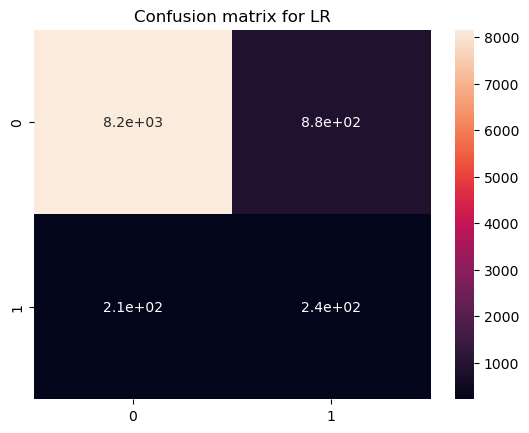

----------------------------------------
DECISION TREE --> DT
------------------------------------

1. Accuracy = 87.85676671932596 %

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8310
           1       0.51      0.49      0.50      1185

    accuracy                           0.88      9495
   macro avg       0.72      0.71      0.72      9495
weighted avg       0.88      0.88      0.88      9495



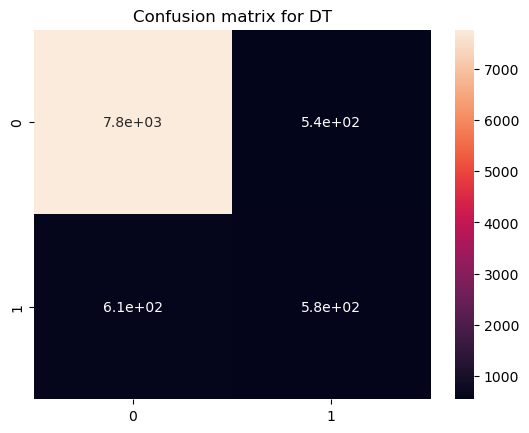

----------------------------------------
PREDICTION 
------------------------------------

------------------------------------------------
[0] The Customer will subscribed to term deposit
------------------------------------------------
------------------------------------------------
[1] The Customer will subscribed to term deposit
------------------------------------------------
------------------------------------------------
[2] The Customer will subscribed to term deposit
------------------------------------------------
------------------------------------------------
[3] The Customer will subscribed to term deposit
------------------------------------------------
------------------------------------------------
[4] The Customer will subscribed to term deposit
------------------------------------------------


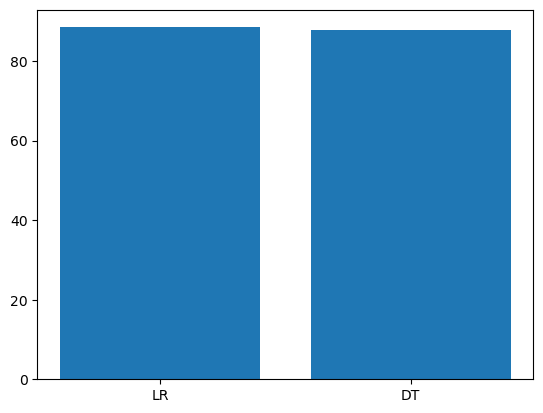

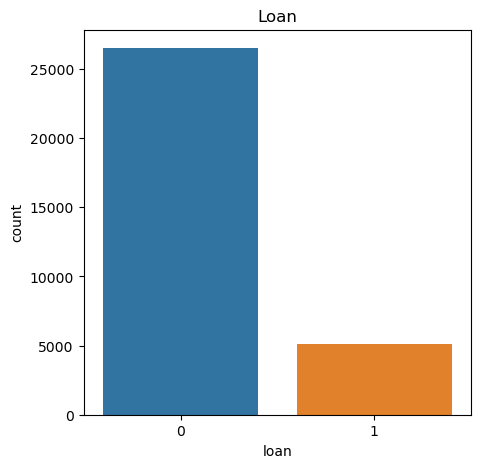

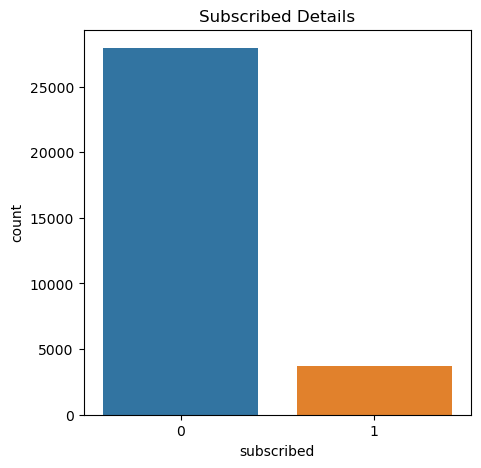

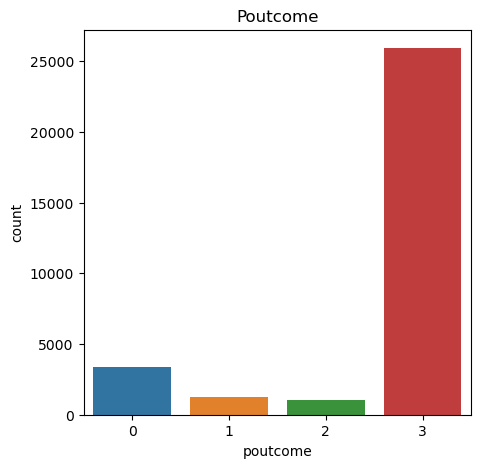

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


#===================== 1. DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("Dataset.csv")
print("-------------------------------------------------------")
print("================== 1.Data Selection ===================")
print("-------------------------------------------------------")
print()
print(data_frame.head(20))

#=====================  2.DATA PREPROCESSING ==========================


#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("-------------------------------------------------------------")
print("================ Before Checking missing values =========")
print("-------------------------------------------------------------")
print()
print(data_frame.isnull().sum())

#=== LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("-------------------------------------------------------------")
print("==================== Before label encoding ==================")
print("------------------------------------------- ------------------")
print()
print(data_frame['subscribed'].head(15))


data_frame['subscribed']= label_encoder.fit_transform(data_frame['subscribed'])

data_frame['job']= label_encoder.fit_transform(data_frame['job'])

data_frame['marital']= label_encoder.fit_transform(data_frame['marital'])


data_frame['education']= label_encoder.fit_transform(data_frame['education'])

data_frame['default']= label_encoder.fit_transform(data_frame['default'])

data_frame['housing']= label_encoder.fit_transform(data_frame['housing'])

data_frame['loan']= label_encoder.fit_transform(data_frame['loan'])

data_frame['contact']= label_encoder.fit_transform(data_frame['contact'])

data_frame['month']= label_encoder.fit_transform(data_frame['month'])

data_frame['poutcome']= label_encoder.fit_transform(data_frame['poutcome'])



print("-------------------------------------------------------------")
print("==================== After label encoding ==================")
print("-------------------------------------------------------------")
print()
print(data_frame['subscribed'].head(15))


#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('subscribed',axis=1)
y=data_frame['subscribed']


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's in dataset: ", data_frame.shape[0])
print()
print("Total No.of training data's  : ", X_train.shape[0])
print()
print("Total No.of testing data's  : ", X_test.shape[0])



#============================  5. CLASSIFICATION =============================

#==== LOGISTIC REGRESSION ====

from sklearn import linear_model


lr = linear_model.LogisticRegression()
 
lr.fit(X_train, y_train)
 
y_pred = lr.predict(X_test)

acc11=metrics.accuracy_score(y_pred,y_test)*100


cm_lr=metrics.confusion_matrix(y_pred,y_test)


print("----------------------------------------")
print("LOGISTIC REGRESSION --> LR")
print("------------------------------------")
print()
print("1. Accuracy =",acc11,'%' )
print()
print(metrics.classification_report(y_pred,y_test))

# === CONFUSION MATRIX ===

sns.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for LR")
plt.show()


# ============ DECISION TREE ===========

from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
 
y_pred_dt = clf.predict(X_test)

acc_dt=metrics.accuracy_score(y_pred_dt,y_test)*100


cm_dt=metrics.confusion_matrix(y_pred_dt,y_test)


print("----------------------------------------")
print("DECISION TREE --> DT")
print("------------------------------------")
print()
print("1. Accuracy =",acc_dt,'%' )
print()
print(metrics.classification_report(y_pred_dt,y_test))

# === CONFUSION MATRIX ===

sns.heatmap(cm_dt, annot=True)
plt.title("Confusion matrix for DT")
plt.show()


# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if y_pred[i]==0:
        print("------------------------------------------------")
        print([i],"The Customer will subscribed to term deposit")
        print("------------------------------------------------")
    else:
        print("----------------------------------------------------")
        print([i],"The Customer will not subscribed to term deposit")
        print("-----------------------------------------------------")        

# ===== COMPARISON =====

vals=[acc11,acc_dt]
inds=range(len(vals))
labels=["LR","DT"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Loan")
sns.countplot(x='loan',data=data_frame)
plt.show()

import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Subscribed Details")
sns.countplot(x='subscribed',data=data_frame)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Poutcome")
sns.countplot(x='poutcome',data=data_frame)
plt.show()